In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

import importlib
import matplotlib.pyplot as plt
import numpy as np

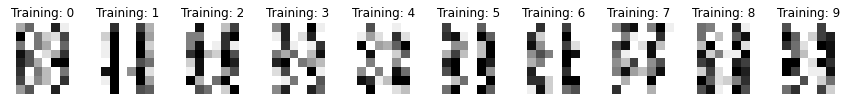

In [2]:
obfuscator = importlib.machinery.SourceFileLoader('obfuscator', './obfuscator.py').load_module()
X, y = obfuscator.get_obfuscated_dataset()
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
n_samples = len(X)
print(f"A total of {n_samples} images are in this dataset")

A total of 1797 images are in this dataset


In [4]:
from sklearn.linear_model import LogisticRegression as lr

data = X.reshape((n_samples, -1))
print(y[0:30])
y[y < 4] = 0
y[y >= 4] = 1
print(y[0:30])

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]


In [5]:
clf = lr()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
np.random.choice(a=predicted, size=100)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [6]:
# This model is very naive, we need to convert regression results to discrete results.
predicted = np.rint(predicted)
np.random.choice(a=predicted, size=100)

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.])

In [7]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       356
           1       0.88      0.94      0.91       543

    accuracy                           0.88       899
   macro avg       0.89      0.87      0.88       899
weighted avg       0.89      0.88      0.88       899




Confusion matrix:
[[284  72]
 [ 32 511]]


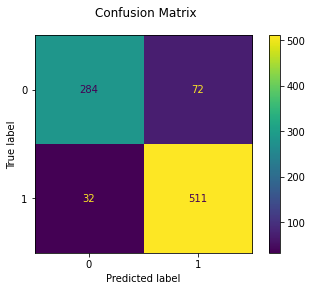

In [8]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()